## CART on Turnover Data

<p>The following notebook provides an example code of Decision Tree model (CART) <b>Manual Hyperparameter Tuning</b>, <b>Feature Selection</b> and <b>Visualization</b>.</p>
The sequence of steps are as follows:

1. Data import,dummification, train test split.

2. Manual Tuning of Decision Tree hyperparameters

3. Building the model using Best hyperparameters

4. Building the final model on the most important features and visualizing the tree

**1. Data import,dummification, train test split.**

In [1]:
#importing the needed libraries
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

#the CART model and visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
#reading the data
URL = "https://raw.githubusercontent.com/srbuhimirzoyan/Business_Analytics_Spring2020/master/Session_6_turnover_data.csv"
df = pd.read_csv(URL)

In [3]:
#data overview
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#transforming categorical variables into dummies
df = pd.get_dummies(df,drop_first=True)

In [6]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [7]:
df.shape

(14999, 19)

In [8]:
#dropping duplicates
df = df.drop_duplicates()

In [9]:
#separating X and Y
Y = df.churn
X = df.drop("churn",axis=1)

In [10]:
#Splitting the data into training and testing sets
X0, X1, Y0, Y1 = train_test_split(X,Y,test_size=0.25,random_state=42)

**2. Manual Tuning of Decision Tree hyperparameters**

We will use a `make_tree` function to see which hyperparameters produce the largest values of ROC AUC and Recall.
The hyperparameters that we will change are:

**max_depth** : The maximum depth of the tree. If None, then nodes are expanded until all leaves are
                pure or until all leaves contain less than min_samples_split samples.
                
**min_samples_leaf**:The minimum number of samples required to be at a leaf node. A split point at
                     any depth will only be considered if it leaves at least ``min_samples_leaf``
                     training samples in each of the left and right branches. This may have the
                     effect of smoothing the model,especially in regression. 
                     
**class_weight**: "balanced" or None. If not given, all classes are supposed to have weight one. For
                   multi-output problems, a list of dicts can be provided in the same order as the 
                   columns of y.

In [11]:
def make_tree(model):
    '''Function getting estimator(sklearn model) and prints the specified metrics.
        Args:
            model, sklearn's DecisionTree estimator
        Returns:
            prints out ROC AUC and Recall Scores for training and testing sets'''
    tree_0 = model
    tree_0.fit(X0,Y0)

    Y0_0_proba = tree_0.predict_proba(X0)[:,1] #train
    Y1_0_proba = tree_0.predict_proba(X1)[:,1] #test

    Y0_0_class = np.where(Y0_0_proba>0.5,1,0) #train
    Y1_0_class = np.where(Y1_0_proba>0.5,1,0) #test

    print("Train ROC AUC by tree_0:",roc_auc_score(Y0,Y0_0_proba))
    print("Test ROC AUC by tree_0:",roc_auc_score(Y1,Y1_0_proba))

    print("\n")

    print("Train Recall by tree_0:",recall_score(Y0,Y0_0_class))
    print("Test Recall by tree_0:",recall_score(Y1,Y1_0_class))

In [12]:
#model with default parameters
make_tree(DecisionTreeClassifier(random_state=42))

Train ROC AUC by tree_0: 1.0
Test ROC AUC by tree_0: 0.9425332482701084


Train Recall by tree_0: 1.0
Test Recall by tree_0: 0.9094567404426559


In [13]:
make_tree(DecisionTreeClassifier(max_depth=7,class_weight="balanced",random_state=42))

Train ROC AUC by tree_0: 0.9870189296100702
Test ROC AUC by tree_0: 0.9676640410234297


Train Recall by tree_0: 0.9437751004016064
Test Recall by tree_0: 0.9175050301810865


In [14]:
make_tree(DecisionTreeClassifier(min_samples_leaf=85,random_state=42))

Train ROC AUC by tree_0: 0.9876628798163718
Test ROC AUC by tree_0: 0.975165668139183


Train Recall by tree_0: 0.9183400267737617
Test Recall by tree_0: 0.9054325955734407


In [15]:
make_tree(DecisionTreeClassifier(max_depth=7,min_samples_leaf=85,random_state=42))

Train ROC AUC by tree_0: 0.982160405858666
Test ROC AUC by tree_0: 0.9762976097287442


Train Recall by tree_0: 0.9183400267737617
Test Recall by tree_0: 0.9054325955734407


**3. Building the model using Best hyperparameters**

In [16]:
tree_best = DecisionTreeClassifier(max_depth=7,min_samples_leaf=85,random_state=42)
tree_best.fit(X0,Y0)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=85, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [17]:
#retrieving the importances of features(independent variables)
pd.DataFrame(data=tree_best.feature_importances_,index=X0.columns)

,0
satisfaction_level,0.399944
last_evaluation,0.154216
number_project,0.243330
average_montly_hours,0.062383
time_spend_company,0.140127
work_accident,0.000000
promotion_last_5years,0.000000
department_RandD,0.000000
department_accounting,0.000000
department_hr,0.000000


In [18]:
#building the final tree on the features having non-zero importances and using best hyperparameters
tree_final = DecisionTreeClassifier(max_depth=7,min_samples_leaf=85,random_state=42)
tree_final.fit(X0[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company"]],Y0)

Y0_best_proba = tree_final.predict_proba(X0[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company"]])[:,1]
Y1_best_proba = tree_final.predict_proba(X1[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company"]])[:,1]

Y0_best_class = np.where(Y0_best_proba>0.5,1,0)
Y1_best_class = np.where(Y1_best_proba>0.5,1,0)

print("Train ROCAUC:",roc_auc_score(Y0,Y0_best_proba))
print("Test ROCAUC:",roc_auc_score(Y1,Y1_best_proba))

Train ROCAUC: 0.982160405858666
Test ROCAUC: 0.9762976097287442


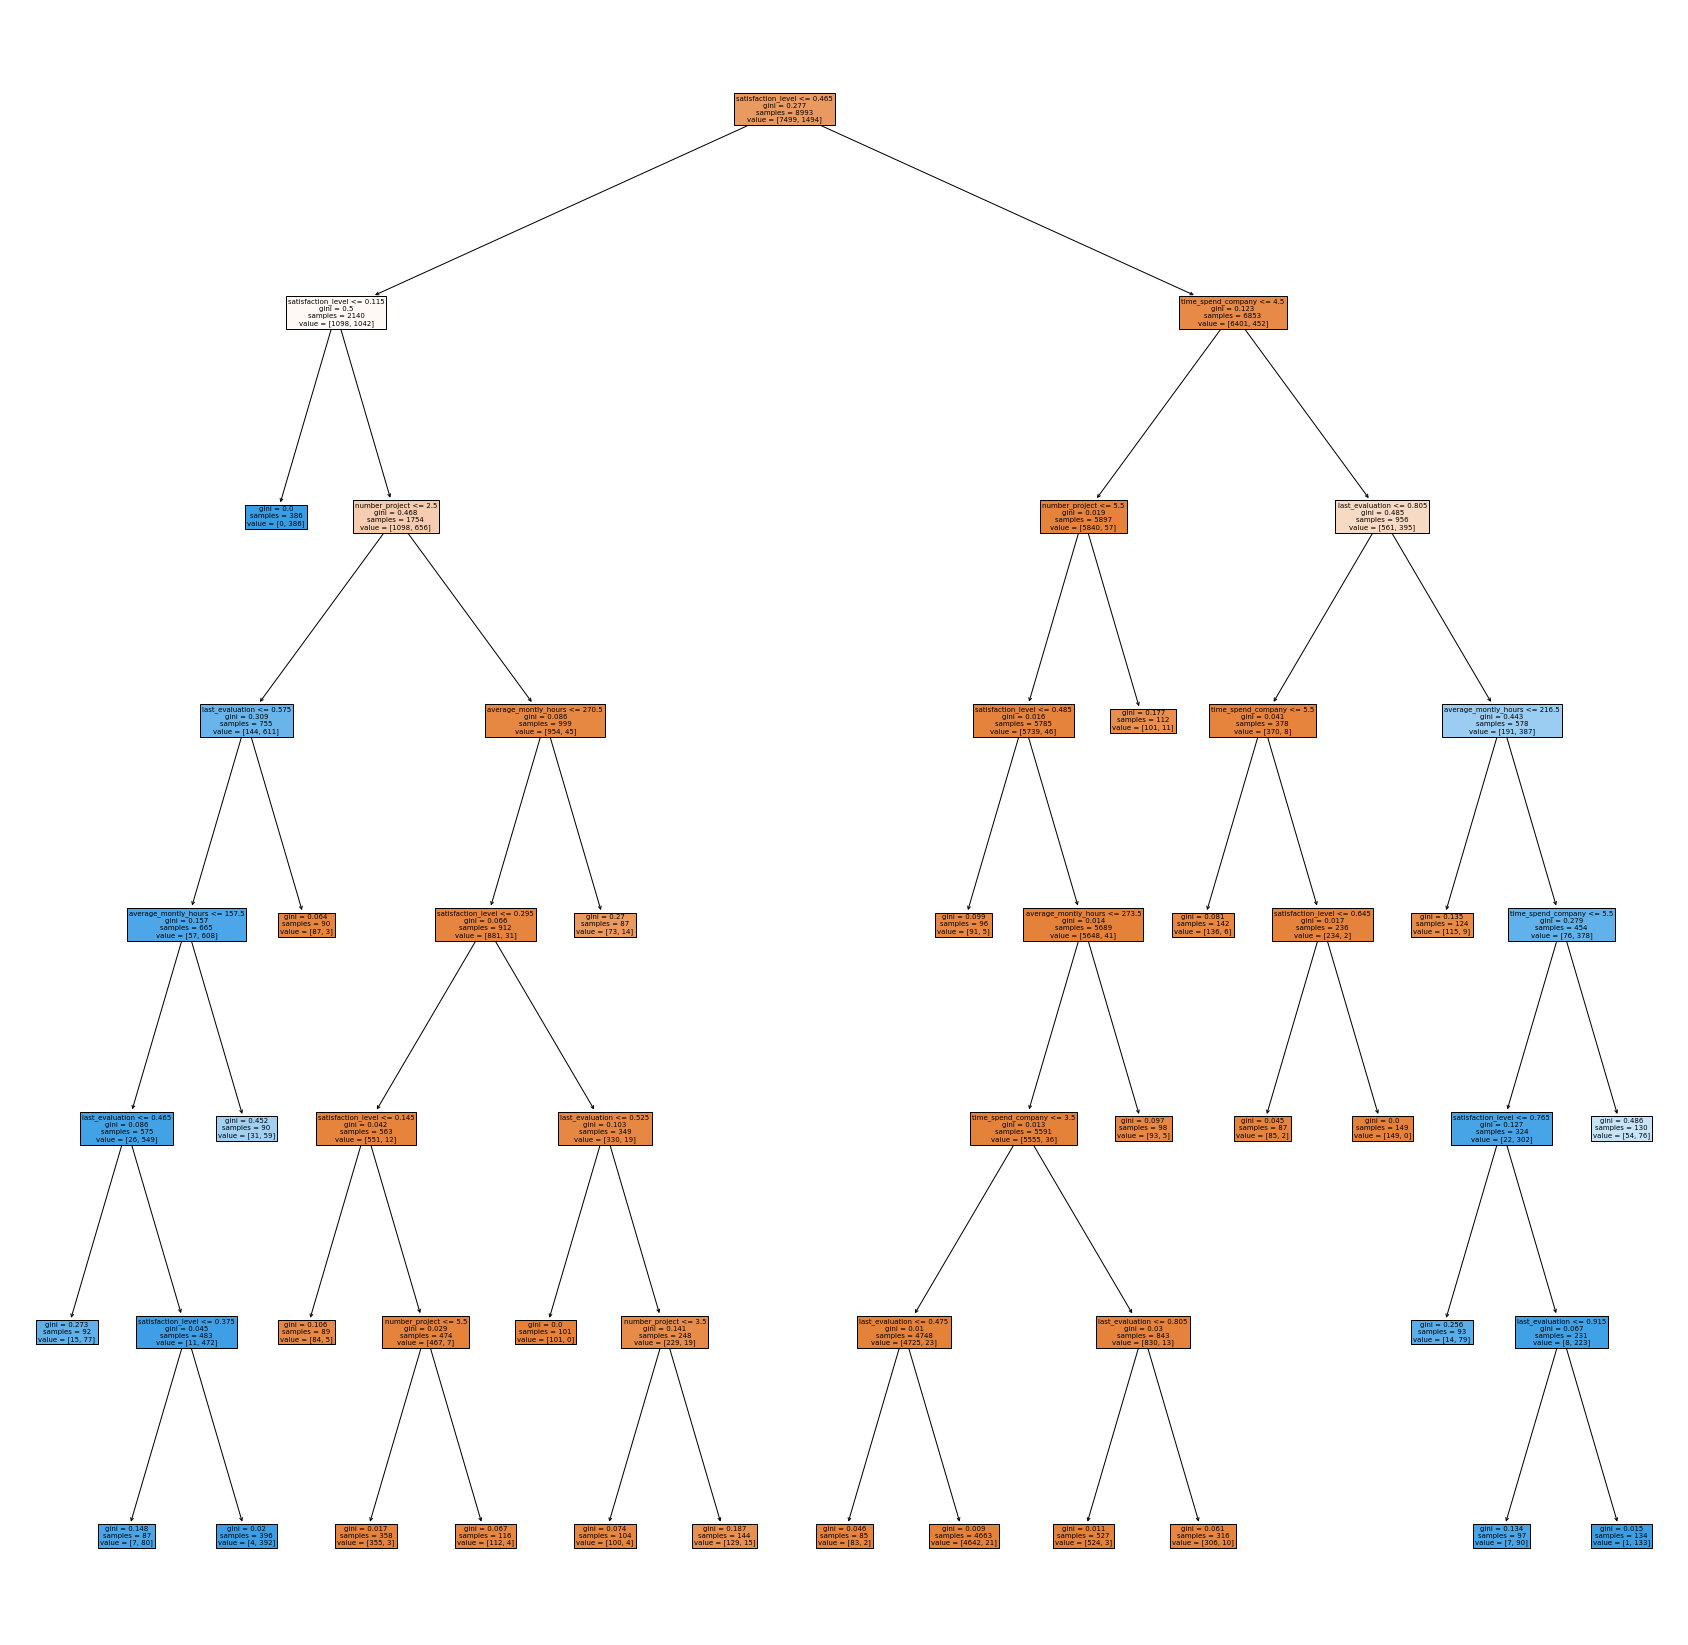

In [19]:
#visualizing the final tree
plt.figure(figsize=(30,30))
plot_tree(tree_final,filled=True,feature_names=X0.columns)
plt.show()